In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os



In [15]:
summary_data=pd.read_csv('data/file_information.csv')
summary_data

,File,Task,Category
0,g0pA_taska.txt,a,non
1,g0pA_taskb.txt,b,cut
2,g0pA_taskc.txt,c,light
3,g0pA_taskd.txt,d,heavy
4,g0pA_taske.txt,e,non
...,...,...,...
95,orig_taska.txt,a,orig
96,orig_taskb.txt,b,orig
97,orig_taskc.txt,c,orig
98,orig_taskd.txt,d,orig


In [6]:
print("\nDistribution among tasks and plagiarism categories:\n")
pd.crosstab(summary_data['Category'],summary_data['Task'],margins=True)


Distribution among tasks and plagiarism categories:



Task,a,b,c,d,e,All
Category,,,,,,
cut,4,3,3,4,5,19
heavy,3,4,5,4,3,19
light,3,3,4,5,4,19
non,9,9,7,6,7,38
orig,1,1,1,1,1,5
All,20,20,20,20,20,100


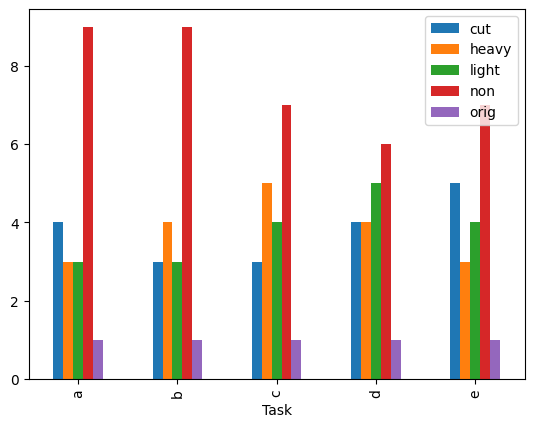

In [7]:
fig,ax=plt.subplots()
summary_data.groupby(by=['Task','Category']).count().unstack().plot(kind='bar',stacked=False, ax=ax)
ax.legend(['cut','heavy','light','non','orig']);

In [8]:
def class_to_numbers(csv):
    df=pd.read_csv(csv)
    df['Category']=df['Category'].map({'non':0,'heavy':1,'light':2,'cut':3,'orig':-1})
    df['Class']=df['Category'].map({0:0,1:1,2:1,3:1,-1:-1})
    return df

In [9]:
df=class_to_numbers('data/file_information.csv')
df

,File,Task,Category,Class
0,g0pA_taska.txt,a,0,0
1,g0pA_taskb.txt,b,3,1
2,g0pA_taskc.txt,c,2,1
3,g0pA_taskd.txt,d,1,1
4,g0pA_taske.txt,e,0,0
...,...,...,...,...
95,orig_taska.txt,a,-1,-1
96,orig_taskb.txt,b,-1,-1
97,orig_taskc.txt,c,-1,-1
98,orig_taskd.txt,d,-1,-1


In [11]:
texts = []
for i in df['File']:
    with open('data/'+i,'r',encoding='UTF-8',errors='ignore') as f:
        line=f.read()
        line=re.sub(r'[^\w\s]', ' ',line.lower())
        line=line.replace('\n',' ')
        line=line.replace('\t',' ')
        line=line.replace('   ',' ')
        line=line.replace('  ',' ')
        texts.append(line)
        f.close()
df['Text']=texts
del(texts)
df.head(10)


,File,Task,Category,Class,Text
0,g0pA_taska.txt,a,0,0,inheritance is a basic concept of object orien...
1,g0pA_taskb.txt,b,3,1,pagerank is a link analysis algorithm used by ...
2,g0pA_taskc.txt,c,2,1,the vector space model also called term vector...
3,g0pA_taskd.txt,d,1,1,bayes theorem was names after rev thomas bayes...
4,g0pA_taske.txt,e,0,0,dynamic programming is an algorithm design tec...
5,g0pB_taska.txt,a,0,0,inheritance is a basic concept in object orien...
6,g0pB_taskb.txt,b,0,0,pagerank pr refers to both the concept and the...
7,g0pB_taskc.txt,c,3,1,vector space model is an algebraic model for r...
8,g0pB_taskd.txt,d,2,1,bayes theorem relates the conditional and marg...
9,g0pB_taske.txt,e,1,1,dynamic programming is a method for solving ma...
